In [19]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('bmh')
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('../UNB/flows/TestbedSunJun13Flows.csv')

In [3]:
df_noDNS = df[df.destinationPort != 53]

In [4]:
grouped = df_noDNS.groupby(['destination'])['source']

In [15]:
df2 = pd.DataFrame(grouped.aggregate(lambda x: list(set(x))))
df2.columns= ['sources']

In [23]:
g = nx.Graph()

In [24]:
for ix, row in df2.iterrows():
    for e in itertools.combinations(row['sources'], 2):
        g.add_edge(e[0], e[1])

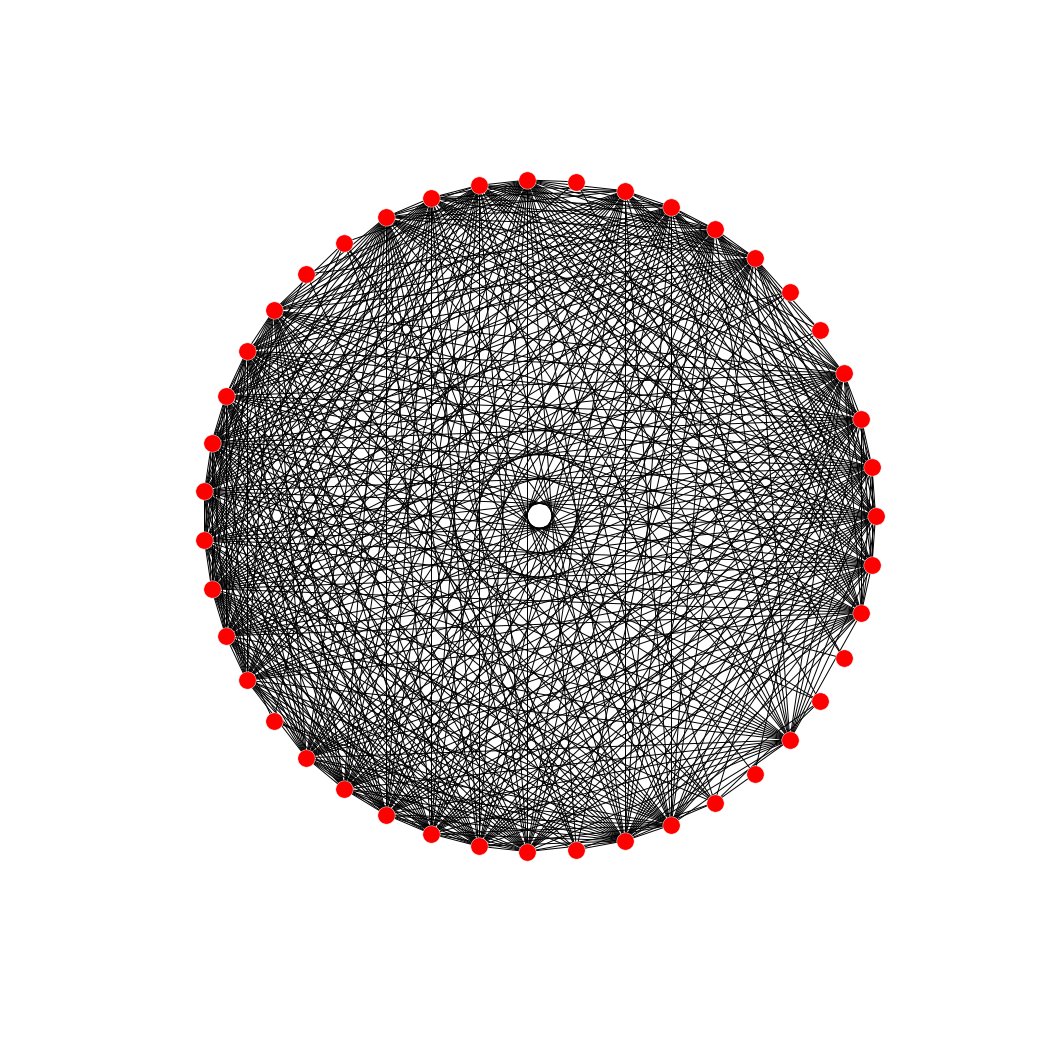

In [37]:
plt.figure(figsize=(14,14))
nx.draw_circular(g)

In [39]:
len(g.edges())

546

In [32]:
len(df.source.unique())

44

In [40]:
cutsets = list(nx.all_node_cuts(g))

In [43]:
cutsets

[{'192.168.1.105', '192.168.2.113'}]

In [47]:
df[df.Tag != 'Normal']['source'].unique()

array(['131.202.243.90', '192.168.1.105', '192.168.3.117', '192.168.5.123',
       '192.168.3.115', '0.0.0.0', '192.168.4.119', '192.168.4.121',
       '192.168.1.103', '192.168.1.104', '192.168.1.101', '192.168.4.118',
       '192.168.2.111', '192.168.2.112', '192.168.5.122', '192.168.2.113',
       '192.168.2.109', '192.168.1.102', '142.167.88.44'], dtype=object)

In [58]:
df3 = pd.read_csv('../UNB/flows/TestbedTueJun15-1Flows.csv')
df4 = pd.read_csv('../UNB/flows/TestbedTueJun15-2Flows.csv')
df5 = pd.read_csv('../UNB/flows/TestbedTueJun15-3Flows.csv')

frames = [df3, df4, df5]
dff = pd.concat(frames)

In [59]:
grouped = dff.groupby(['destination'])['source']
dff2 = pd.DataFrame(grouped.aggregate(lambda x: list(set(x))))
dff2.columns= ['sources']

In [60]:
g2 = nx.Graph()
for ix, row in dff2.iterrows():
    for e in itertools.combinations(row['sources'], 2):
        g2.add_edge(e[0], e[1])

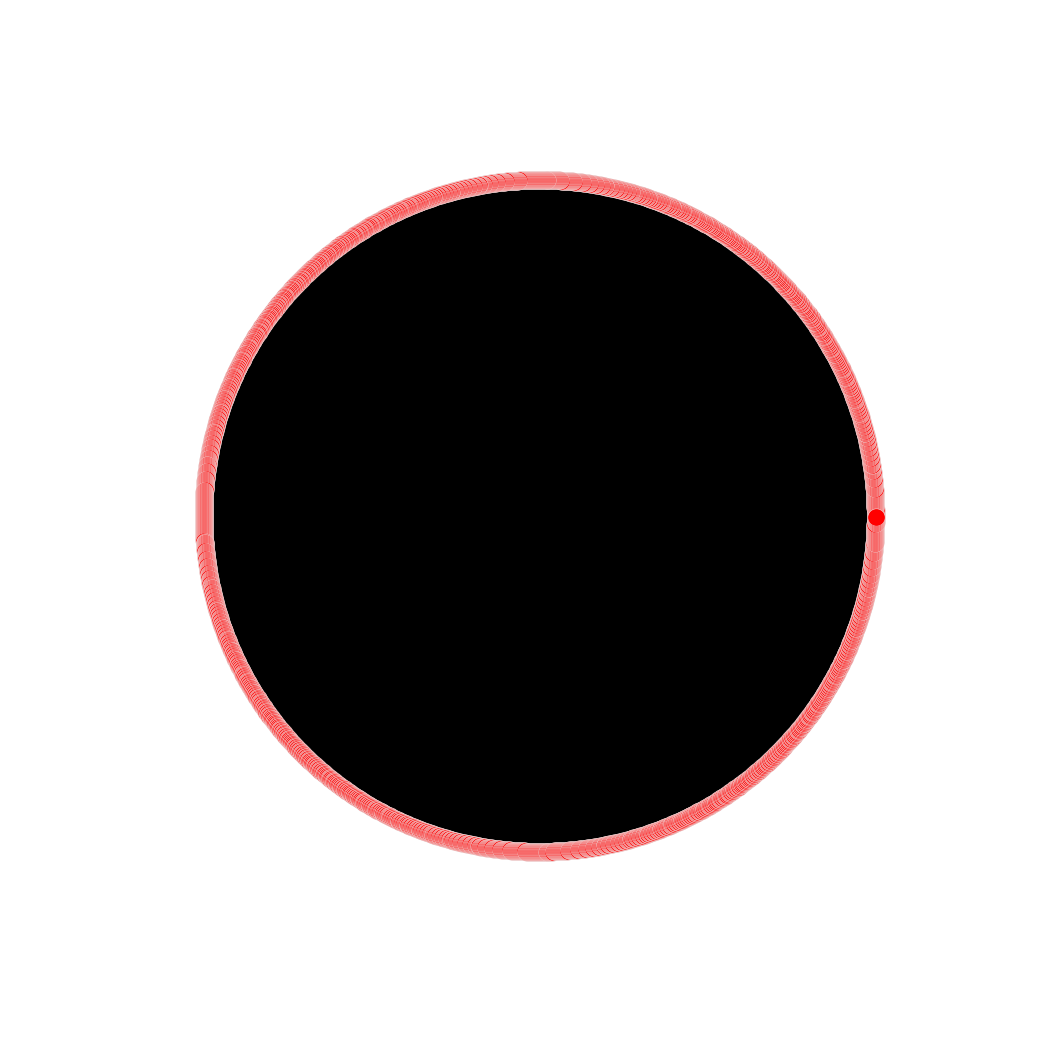

In [61]:
plt.figure(figsize=(14,14))
nx.draw_circular(g2)

In [62]:
cutsets = list(nx.all_node_cuts(g2))
cutsets

[{'142.166.115.13'}]

In [63]:
len(g2.nodes())

2132